This document will highlight the **Jr. Product Owner: Case Study** for **Integra Partners**.

We will first review the scenarios and related tasks, then present a mock example using randomly generated data.

# Scenario
You are the Junior Product Owner responsible for managing a Tier 1 Support Team that handles day-to-day user requests for a cloud-based application. Over the past month, your team has received an increasing number of support tickets related to intermittent login failures. While these issues are being resolved individually, the volume of tickets is growing, and some users are becoming frustrated with the frequency of this problem.

Your role is to determine how best to address this situation and ensure it doesn’t become a recurring issue.

## Task 1: Data Analysis and Trend Identification
Analyze the data from the past month’s support tickets. You notice that many login failure issues come from specific user groups, particularly those accessing the system during peak hours. There are similarities in the error messages these users report, suggesting a potential pattern or underlying issue.

1. What specific data would you prioritize further to investigate the root cause of these login failures?
2. Based on the data, what trends can you identify, and
3. How would you use this information to escalate the issue to the Tier 3 Support Team for futher investigation?

First, we believe that **Timestamps of Failures**, **Error Types**, and **User Environment** are the top 3 areas we can prioritize first. 

- **Timestamps of Failures** can help with visualizing spikes in errors and help determine if there are server capacity limits in our systems. Timestamps can help us pinpoint which specific timeframe we are seeing issues. Perhaps there is heavy traffic at specific timeframes and the system is overloaded and is not scaling well. This could be a sign that additional server resources are required and the infrastructure team will need to be engaged.

- **Error Types** can show the nature of issues and types of errors we are receiving. These can be **Timeouts**, **Service Unavailable**, **Authentication Failed**, or any other types of errors. The Error Types can suggest backend issues, like an authentication service failure or delayed response from the server. Tabulating the number of specific requests can help point the Tier 3 system in the right direction in resolving the issues.

- **User Environment** is important because it can show various configuration issues. For example, perhaps, there is a difference in issues reported for Windows vs Mac or different browser options. If specific user groups are experiencing more failures, then there may be a network-related issue (slow VPN connections, regional server problems, or something else) or inconsistent system configuration for our users.

When escalating to a Tier 3 Support Team, we would provide the **overall problem** and highlight the **business value**. We would visualize the number of errors and error types, highlight the spikes of errors between 8am - 6pm, and make note of the errors based on environment. We would also quantify the monetary business value and business impact of time loss and overall morale of wasted time for the affected users.

As we are not provided specific data on the problems **Integra Partners** are facing, we will create randomly generated test data for our report.

In [1]:
# Import Libraries
import csv # Python library used for reading and writing tabular data in CSV format.
import pandas as pd # Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data. 
import json # Python library for encoding and decoding custom objects by using JSON encoder and decoder classes.
import numpy as np # Python library for adding support to large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import seaborn as sns #Python library for statistical visualizations
import statistics as stat #Python library for statistical operations
import matplotlib.pyplot as plt # Python library for creating graphs
import random # Python library for generating random data

from scipy import stats # Python library for linear regression
from datetime import datetime, timedelta # Python library used for dates and time

random.seed(4) # Set the seed for generating the same random data.
np.random.seed(4)

In [2]:
# Sample data for random generation
user_groups = ['Finance', 'Sales', 'HR', 'IT', 'Marketing', 'Operations']
error_messages = ['Invalid credentials', '503 Service Unavailable', 'Session timeout', 'User not found', 'Network error', 'CAPTCHA failed']
locations = ['Office', 'Remote']
devices = ['Desktop', 'Mobile', 'Tablet']
browsers = ['Chrome 87', 'Firefox 95', 'Edge 92', 'Safari 14', 'Opera 75']
root_causes = ['User error', 'Network issue', 'System downtime', 'Server overload', 'Firewall block']
resolution_steps = ['Password reset', 'Clear cache', 'Network reset', 'Escalated to Tier 3', 'Restart system']

In [3]:
# Create Columns for the DataFrame
columns = ['Ticket ID', 'User Group', 'User ID', 'Error Message', 'Date and Time of Issue', 'Login Attempt Time', 
           'Location', 'Device Type', 'Browser/OS Version', 'Resolution Time', 'Escalation Status', 
           'Root Cause', 'Resolution Steps Taken', 'SLA Compliance', 'Additional Notes']

In [4]:
# Function to generate a random time between 8AM and 6PM
def random_time_between_8am_and_6pm(base_date):
    random_hour = random.randint(8, 18)  # 8AM to 6PM
    random_minute = random.randint(0, 59)
    return base_date.replace(hour=random_hour, minute=random_minute, second=0)

# Function to generate resolution time between 5 minutes and 6 hours
def random_resolution_time(issue_time):
    resolution_minutes = random.randint(5, 360)  # 5 minutes to 6 hours (360 minutes)
    return issue_time + timedelta(minutes=resolution_minutes)

# Random data generation with time constraints
data = []
start_date = datetime.now() - timedelta(days=30)

for i in range(50):
    ticket_id = f"TID{i+1:03d}"
    user_group = random.choice(user_groups)
    user_id = f"U{random.randint(1000, 9999)}"
    error_message = random.choice(error_messages)
    
    base_date = start_date + timedelta(days=random.randint(0, 29))
    date_time_of_issue = random_time_between_8am_and_6pm(base_date)  # New constraint for issue time
    login_attempt_time = date_time_of_issue + timedelta(minutes=random.randint(-10, 10))  # Allow some deviation around issue time
    
    location = random.choice(locations)
    device_type = random.choice(devices)
    browser_version = random.choice(browsers)
    
    resolution_time = random_resolution_time(date_time_of_issue)  # New constraint for resolution time
    escalation_status = 'Yes' if random.random() < 0.3 else 'No'
    root_cause = random.choice(root_causes)
    resolution_steps_taken = random.choice(resolution_steps)
    sla_compliance = 'Yes' if resolution_time - date_time_of_issue <= timedelta(hours=1) else 'No'
    additional_notes = "Issue resolved" if escalation_status == 'No' else "Escalated to Tier 3"

    data.append([ticket_id, user_group, user_id, error_message, date_time_of_issue, login_attempt_time, location, device_type, browser_version, 
                         resolution_time, escalation_status, root_cause, resolution_steps_taken, sla_compliance, additional_notes])

# Creating DataFrame with updated time constraints
df = pd.DataFrame(data, columns=columns)
df.head()


,Ticket ID,User Group,User ID,Error Message,Date and Time of Issue,Login Attempt Time,Location,Device Type,Browser/OS Version,Resolution Time,Escalation Status,Root Cause,Resolution Steps Taken,SLA Compliance,Additional Notes
0,TID001,Sales,U5969,Invalid credentials,2024-11-07 14:30:00.796455,2024-11-07 14:24:00.796455,Office,Desktop,Chrome 87,2024-11-07 18:00:00.796455,No,System downtime,Password reset,No,Issue resolved
1,TID002,Sales,U9525,Network error,2024-10-26 12:49:00.796455,2024-10-26 12:44:00.796455,Office,Mobile,Firefox 95,2024-10-26 13:07:00.796455,No,System downtime,Network reset,Yes,Issue resolved
2,TID003,Sales,U3700,Session timeout,2024-10-24 18:55:00.796455,2024-10-24 18:56:00.796455,Office,Tablet,Edge 92,2024-10-25 00:43:00.796455,No,Network issue,Clear cache,No,Issue resolved
3,TID004,Sales,U8759,Session timeout,2024-10-17 16:53:00.796455,2024-10-17 16:52:00.796455,Office,Mobile,Opera 75,2024-10-17 19:37:00.796455,No,Firewall block,Clear cache,No,Issue resolved
4,TID005,IT,U7942,Network error,2024-10-24 14:28:00.796455,2024-10-24 14:23:00.796455,Office,Mobile,Edge 92,2024-10-24 14:55:00.796455,Yes,Server overload,Network reset,Yes,Escalated to Tier 3


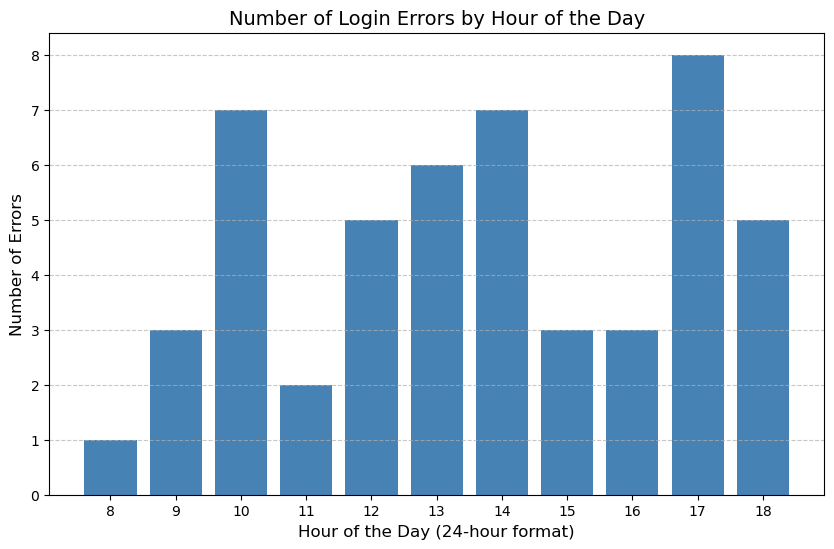

In [5]:
import matplotlib.pyplot as plt

# Extract hours from the 'Date and Time of Issue' column
df['Issue Hour'] = df['Date and Time of Issue'].dt.hour

# Group by the hour of the day to count the number of errors
error_by_hour = df.groupby('Issue Hour').size()

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(error_by_hour.index, error_by_hour.values, color='steelblue')
plt.title('Number of Login Errors by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Errors', fontsize=12)
plt.xticks(range(8, 19))  # Show only hours between 8 AM and 6 PM
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
plt.close()

Based on our *fake data*, we see that there are spikes of login-related issues at the beginning of the day (10AM), midday (1PM-2PM), and end-of-day (5PM). 



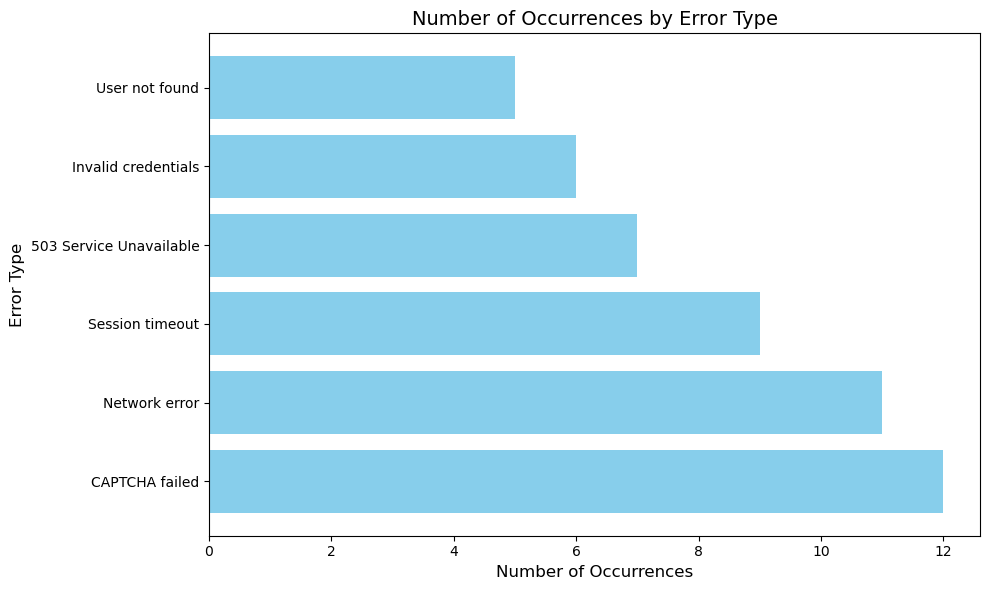

In [7]:
# Group by 'Error Message' and count occurrences
error_count = df['Error Message'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(error_count.index, error_count.values, color='skyblue')
plt.title('Number of Occurrences by Error Type', fontsize=14)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Error Type', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()